In [12]:

# ] add DelimitedFiles
using DelimitedFiles
using PyPlot

In [13]:

url = "https://www.phys.uconn.edu/~rozman/Courses/P2200_25F/downloads/trinity-test.data"


"https://www.phys.uconn.edu/~rozman/Courses/P2200_25F/downloads/trinity-test.data"

In [14]:
obsevations = download(url)

"/tmp/jl_HsNmLilmPC"

In [15]:
dat = readdlm(obsevations, comments=true, comment_char='#')

25×2 Matrix{Float64}:
  0.1    11.1
  0.24   19.9
  0.38   25.4
  0.52   28.8
  0.66   31.9
  0.8    34.2
  0.94   36.3
  1.08   38.9
  1.22   41.0
  1.36   42.8
  1.5    44.4
  1.65   46.0
  1.79   46.9
  1.93   48.7
  3.26   59.0
  3.53   61.1
  3.8    62.9
  4.07   64.3
  4.34   65.6
  4.61   67.3
 15.0   106.5
 25.0   130.0
 34.0   145.0
 53.0   175.0
 62.0   185.0

In [17]:
t = dat[:,1]

25-element Vector{Float64}:
  0.1
  0.24
  0.38
  0.52
  0.66
  0.8
  0.94
  1.08
  1.22
  1.36
  1.5
  1.65
  1.79
  1.93
  3.26
  3.53
  3.8
  4.07
  4.34
  4.61
 15.0
 25.0
 34.0
 53.0
 62.0

In [18]:
radius = dat[:,2]

25-element Vector{Float64}:
  11.1
  19.9
  25.4
  28.8
  31.9
  34.2
  36.3
  38.9
  41.0
  42.8
  44.4
  46.0
  46.9
  48.7
  59.0
  61.1
  62.9
  64.3
  65.6
  67.3
 106.5
 130.0
 145.0
 175.0
 185.0

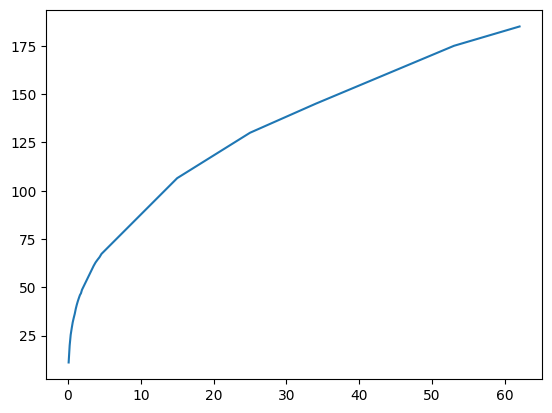

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x73dbeb384c50>

In [19]:
plot(t,radius)


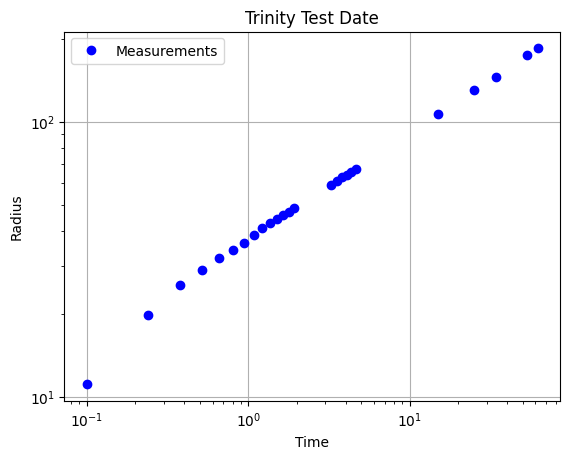

PyObject Text(0.5, 1.0, 'Trinity Test Date')

In [21]:
loglog(t, radius, "bo", label="Measurements")
grid(true)
xlabel("Time")
ylabel("Radius")
legend()
title("Trinity Test Date")

In [29]:
xbar = sum(log.(t[3:end]))

26.135711912572354

In [30]:
rlogbar = sum(log.(radius[3:end]))

93.45390196234251

nm = length(t[3:end])

In [31]:
nm = length(t[3:end])

23

In [33]:
tlogbar = sum(log.(t[3:end]))/nm

1.1363353005466241

In [34]:
rlogbar = sum(log.(radius[3:end]))/nm

4.063213128797501

In [35]:
alphalogbar = rlogbar - 2/5*tlogbar

3.608679008578851

In [45]:
const scale = 1.0e6   # Extra factor due to measuring time in ms
const rho = 1.2       # Density of air in kg/m^3 at T = 20 C
const tnt = 4.184e12; # J per 1 kt of TNT

In [46]:
alpha = exp(alphalogbar)
println("α = $(round(alpha, sigdigits=4))")

α = 36.92


In [47]:
energyJ = scale * alpha^5 * rho 
println("E = $(round(energyJ, sigdigits=3)) Joules")

E = 8.23e13 Joules


In [48]:
energyT = energyJ / tnt  # Equivalent amount of TNT in kilotons
println("E = $(round(energyT, sigdigits=3)) kilotons of TNT")

E = 19.7 kilotons of TNT


In [52]:
rad(t, alpha) = alpha * t^2/5 

rad (generic function with 1 method)

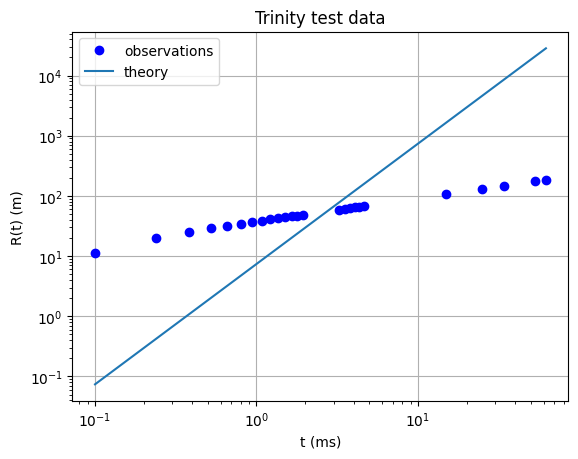

In [53]:
loglog(t, radius, "bo", label="observations")
loglog(t, rad.(t, alpha), "-", label="theory")

grid(true)
xlabel("t (ms)")
ylabel("R(t) (m)")
title("Trinity test data")
legend();